In [2]:
library(repr)
suppressMessages(library(ggplot2))
suppressMessages(library(dplyr))
suppressMessages(library(iMKT))
suppressMessages(library(data.table))
source('/home/jmurga/mktComparison/src/plotStyle.R')

Warning message in file(filename, "r", encoding = encoding):
“cannot open file '/home/jmurga/mktComparison/src/plotStyle.R': No such file or directory”

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [3]:
options(repr.plot.width=20, repr.plot.height=15)

## *Drosophila melanogaster* alpha values
We do not analyze genes which Pi, P0, Di or D0 are 0

In [1]:
source('/home/jmurga/mktComparison/scripts/src/geneAnalysis.R')

Loading required package: ggplot2


In [3]:
dmelDataset <- fread('/home/jmurga/mktComparison/results/dsimDmelData.tab')
dmelDataset %>%head

id,pop,daf0f,daf4f,p0,pi,di,d0,chr,mi,m0,recomb
FBgn0000008,RAL,30;7;4;0;1;0;0;0;1;1;0;0;1;0;0;0;0;0;0;0,24;5;3;3;0;0;1;1;1;0;1;1;0;1;0;0;1;0;0;0,42,45,27,31,2R,2539,667,2.1692837
FBgn0000008,ZI,67;2;2;3;0;0;0;1;0;0;0;1;0;0;0;0;0;0;0;0,55;7;4;3;2;3;1;4;0;1;0;0;0;0;1;0;0;1;0;0,82,76,26,31,2R,2539,667,2.1692837
FBgn0000014,RAL,2;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,1;0;1;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;1;0,4,2,1,20,3R,1153,292,0.7616990
FBgn0000014,ZI,4;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,10;0;0;1;0;1;0;0;0;0;0;0;0;1;0;1;0;0;0;2,16,4,1,18,3R,1153,292,0.7616990
FBgn0000015,RAL,3;0;0;0;0;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0,5;0;3;1;0;1;0;0;0;0;1;0;0;1;1;0;0;0;0;0,13,4,0,3,3R,962,232,0.4352566
FBgn0000015,ZI,10;0;3;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,19;3;2;0;0;1;0;1;2;0;1;0;0;2;0;0;0;0;0;0,31,13,1,3,3R,962,232,0.4352566


In [4]:
dmelGeneList <- unique(dmelDataset[['id']]);dmelGeneList %>% head

[1] "FBgn0000008" "FBgn0000014" "FBgn0000015" "FBgn0000017" "FBgn0000018"
[6] "FBgn0000022"

### Raleigh

In [5]:
ral <- dmelDataset[pop=='RAL'];ral %>% head

id,pop,daf0f,daf4f,p0,pi,di,d0,chr,mi,m0,recomb
FBgn0000008,RAL,30;7;4;0;1;0;0;0;1;1;0;0;1;0;0;0;0;0;0;0,24;5;3;3;0;0;1;1;1;0;1;1;0;1;0;0;1;0;0;0,42,45,27,31,2R,2539,667,2.1692837
FBgn0000014,RAL,2;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,1;0;1;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;1;0,4,2,1,20,3R,1153,292,0.7616990
FBgn0000015,RAL,3;0;0;0;0;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0,5;0;3;1;0;1;0;0;0;0;1;0;0;1;1;0;0;0;0;0,13,4,0,3,3R,962,232,0.4352566
FBgn0000017,RAL,12;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,14;2;0;1;0;0;0;0;0;0;0;0;0;0;2;0;0;0;0;2,21,12,141,93,3L,3325,913,0.8999361
FBgn0000018,RAL,5;0;0;0;0;1;0;0;1;1;0;0;2;1;0;0;0;0;0;0,5;3;1;0;0;0;2;0;1;1;0;0;0;0;0;0;0;0;0;0,13,11,20,18,2L,1026,238,2.9318767
FBgn0000022,RAL,0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,0,0,0,0,X,392,75,0.0000000


#### Standard MKT

In [6]:
standardRAL <- mktByGene(data=ral,geneList =dmelGeneList,test = 'standardMKT', population = 'RAL')
save(standardRAL,file='/home/jmurga/mktComparison/results/alphaTables/standardRAL.RData')

#### FWW method

In [ ]:
FWWRAL0.05 <- mktByGene(data=ral,geneList =dmelGeneList,test = 'FWW', cutoff= 0.05, population = 'RAL')
save(FWWRAL0.05,file='/home/jmurga/mktComparison/results/alphaTables/FWWRAL0.05.RData')

In [ ]:
FWWRAL0.1 <- mktByGene(data=ral,geneList =dmelGeneList,test = 'FWW', cutoff= 0.1, population = 'RAL')
save(FWWRAL0.1,file='/home/jmurga/mktComparison/results/alphaTables/FWWRAL0.1.RData')

#### eMKT

In [ ]:
eMKTRAL0.05 <- mktByGene(data=ral,geneList =dmelGeneList,test = 'eMKT', cutoff= 0.05, population = 'RAL')
save(eMKTRAL0.05,file='/home/jmurga/mktComparison/results/alphaTables/eMKTRAL0.05.RData')

In [ ]:
eMKTRAL0.1 <- mktByGene(data=ral,geneList =dmelGeneList,test = 'eMKT', cutoff= 0.1, population = 'RAL')
save(eMKTRAL0.1,file='/home/jmurga/mktComparison/results/alphaTables/eMKTRAL0.1.RData')

#### aMKT

In [ ]:
aMKTRAL <- mktByGene(data=ral,geneList =dmelGeneList,test = 'aMKT', population = 'RAL')
save(aMKTRAL,file='/home/jmurga/mktComparison/results/alphaTables/aMKTRAL.RData')

#### Custom aMKT

In [ ]:
caMKTRAL <- mktByGene(data=ral,geneList =dmelGeneList,test = 'caMKT', population = 'RAL')
save(caMKTRAL,file='/home/jmurga/mktComparison/results/alphaTables/caMKTRAL.RData')

### Zambia

In [ ]:
zi <- dmelDataset[pop=='ZI'];zi %>% head

#### Standard MKT

In [ ]:
standardZI <- mktByGene(data=zi,geneList = dmelGeneList,test = 'standardMKT', population = 'ZI')

#### FWW method

In [ ]:
FWWZI0.05 <- mktByGene(data=zi,geneList = dmelGeneList,test = 'FWW', cutoff= 0.05, population = 'ZI')

In [ ]:
FWWZI0.1 <- mktByGene(data=zi,geneList = dmelGeneList,test = 'FWW', cutoff= 0.1, population = 'ZI')

#### eMKT

In [ ]:
eMKTZI0.05 <- mktByGene(data=zi,geneList = dmelGeneList,test = 'eMKT', cutoff= 0.05, population = 'ZI')

In [ ]:
eMKTZI0.1 <- mktByGene(data=zi,geneList = dmelGeneList,test = 'eMKT', cutoff= 0.1, population = 'ZI')

#### aMKT

In [ ]:
aMKTZI <- mktByGene(data=zi,geneList = dmelGeneList,test = 'aMKT', population = 'ZI')

#### Custom aMKT

In [ ]:
caMKTZI <- mktByGene(data=zi,geneList = dmelGeneList,test = 'caMKT', population = 'ZI')

#### Save results

In [ ]:
save(standardZI,file='/home/jmurga/mktComparison/results/alphaTables/standardZI.RData')
save(FWWZI0.05,file='/home/jmurga/mktComparison/results/alphaTables/FWWZI0.05.RData')
save(FWWZI0.1,file='/home/jmurga/mktComparison/results/alphaTables/FWWZI0.1.RData')
save(eMKTZI0.05,file='/home/jmurga/mktComparison/results/alphaTables/eMKTZI0.05.RData')
save(eMKTZI0.1,file='/home/jmurga/mktComparison/results/alphaTables/eMKTZI0.1.RData')
save(aMKTZI,file='/home/jmurga/mktComparison/results/alphaTables/aMKTZI.RData')
save(caMKTZI,file='/home/jmurga/mktComparison/results/alphaTables/caMKTZI.RData')

## Human alpha values 
We do not analyze genes which Pi, P0, Di or D0 are 0

In [ ]:
source('/home/jmurga/mktComparison/scripts/src/geneAnalysis.R')

In [13]:
humanDataset <- fread('/home/jmurga/mktComparison/results/humanData.tab');humanDataset%>%head

id,chr,pop,pi,p0,daf0f,daf4f,mi,m0,di,d0,name,recomb
ENSG00000000457.13_3,1,CEU,3,4,1;0;1;0;0;0;0;0;0;0;0;1;0;0;0;0;0;0;0;0,2;0;1;0;0;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0,1443,332,8,1,SCYL3,0.07891916
ENSG00000000460.16_4,1,CEU,4,2,3;0;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,1;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,1664,350,5,7,C1orf112,0.56232538
ENSG00000000938.12_3,1,CEU,1,2,1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,2;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,1025,249,2,4,FGR,1.93538579
ENSG00000000971.15_3,1,CEU,5,2,2;0;0;1;0;0;0;1;0;0;0;0;0;0;0;1;0;0;0;0,0;0;0;0;0;0;0;0;0;0;0;0;2;0;0;0;0;0;0;0,2460,490,30,14,CFH,0.25803409
ENSG00000001460.17_3,1,CEU,5,0,2;0;1;0;0;1;1;0;0;0;0;0;0;0;0;0;0;0;0;0,0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,679,153,2,3,STPG1,0.41583139
ENSG00000001461.16_3,1,CEU,2,2,2;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,1;0;0;0;0;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0,788,199,2,5,NIPAL3,0.64130688


In [14]:
humanGeneList <- unique(humanDataset[['id']]);humanGeneList %>% head

[1] "ENSG00000000457.13_3" "ENSG00000000460.16_4" "ENSG00000000938.12_3"
[4] "ENSG00000000971.15_3" "ENSG00000001460.17_3" "ENSG00000001461.16_3"

### CEU

In [ ]:
ceu <- humanDataset[pop=='CEU'];ceu %>% head

#### Standard MKT

In [ ]:
standardCEU <- mktByGene(data=ceu,geneList =humanGeneList,test = 'standardMKT', population = 'CEU')

#### FWW method

In [ ]:
FWWCEU0.05 <- mktByGene(data=ceu,geneList =humanGeneList,test = 'FWW', cutoff= 0.05, population = 'CEU')

In [ ]:
FWWCEU0.1 <- mktByGene(data=ceu,geneList =humanGeneList,test = 'FWW', cutoff= 0.1, population = 'CEU')

#### eMKT

In [ ]:
eMKTCEU0.05 <- mktByGene(data=ceu,geneList =humanGeneList,test = 'eMKT', cutoff= 0.05, population = 'CEU')

In [ ]:
eMKTCEU0.1 <- mktByGene(data=ceu,geneList =humanGeneList,test = 'eMKT', cutoff= 0.1, population = 'CEU')

#### aMKT

In [ ]:
aMKTCEU <- mktByGene(data=ceu,geneList =humanGeneList,test = 'aMKT', population = 'CEU')

#### Custom aMKT

In [ ]:
caMKTCEU <- mktByGene(data=ceu,geneList =humanGeneList,test = 'caMKT', population = 'CEU')

#### Save results

In [ ]:
save(standardCEU,file='/home/jmurga/mktComparison/results/alphaTables/standardCEU.RData')
save(FWWCEU0.05,file='/home/jmurga/mktComparison/results/alphaTables/FWWCEU0.05.RData')
save(FWWCEU0.1,file='/home/jmurga/mktComparison/results/alphaTables/FWWCEU0.1.RData')
save(eMKTCEU0.05,file='/home/jmurga/mktComparison/results/alphaTables/eMKTCEU0.05.RData')
save(eMKTCEU0.1,file='/home/jmurga/mktComparison/results/alphaTables/eMKTCEU0.1.RData')
save(aMKTCEU,file='/home/jmurga/mktComparison/results/alphaTables/aMKTCEU.RData')
save(caMKTCEU,file='/home/jmurga/mktComparison/results/alphaTables/caMKTCEU.RData')

### YRI

In [ ]:
yri <- humanDataset[pop=='YRI'];yri %>% head

#### Standard MKT

In [ ]:
standardYRI <- mktByGene(data=yri,geneList =humanGeneList,test = 'standardMKT', population = 'YRI')

#### FWW method

In [ ]:
FWWYRI0.05 <- mktByGene(data=yri,geneList =humanGeneList,test = 'FWW', cutoff= 0.05, population = 'YRI')

In [ ]:
FWWYRI0.1 <- mktByGene(data=yri,geneList =humanGeneList,test = 'FWW', cutoff= 0.1, population = 'YRI')

#### eMKT

In [ ]:
eMKTYRI0.05 <- mktByGene(data=yri,geneList =humanGeneList,test = 'eMKT', cutoff= 0.05, population = 'YRI')

In [ ]:
eMKTYRI0.1 <- mktByGene(data=yri,geneList =humanGeneList,test = 'eMKT', cutoff= 0.1, population = 'YRI')

#### aMKT

In [ ]:
aMKTYRI <- mktByGene(data=yri,geneList =humanGeneList,test = 'aMKT', population = 'YRI')

#### Custom aMKT

In [ ]:
caMKTYRI <- mktByGene(data=yri,geneList =humanGeneList,test = 'caMKT', population = 'YRI')

#### Save results

In [ ]:
save(standardYRI,file='/home/jmurga/mktComparison/results/alphaTables/standardYRI.RData')
save(FWWYRI0.05,file='/home/jmurga/mktComparison/results/alphaTables/FWWYRI0.05.RData')
save(FWWYRI0.1,file='/home/jmurga/mktComparison/results/alphaTables/FWWYRI0.1.RData')
save(eMKTYRI0.05,file='/home/jmurga/mktComparison/results/alphaTables/eMKTYRI0.05.RData')
save(eMKTYRI0.1,file='/home/jmurga/mktComparison/results/alphaTables/eMKTYRI0.1.RData')
save(aMKTYRI,file='/home/jmurga/mktComparison/results/alphaTables/aMKTYRI.RData')
save(caMKTYRI,file='/home/jmurga/mktComparison/results/alphaTables/caMKTYRI.RData')

## Direction of Selection

### *D melanogaster*

In [7]:
source('/home/jmurga/mktComparison/scripts/src/geneAnalysis.R')

In [8]:
dmelDataset <- fread('/home/jmurga/mktComparison/results/dsimDmelData.tab')
dmelDataset %>%head

id,pop,daf0f,daf4f,p0,pi,di,d0,chr,mi,m0,recomb
FBgn0000008,RAL,30;7;4;0;1;0;0;0;1;1;0;0;1;0;0;0;0;0;0;0,24;5;3;3;0;0;1;1;1;0;1;1;0;1;0;0;1;0;0;0,42,45,27,31,2R,2539,667,2.1692837
FBgn0000008,ZI,67;2;2;3;0;0;0;1;0;0;0;1;0;0;0;0;0;0;0;0,55;7;4;3;2;3;1;4;0;1;0;0;0;0;1;0;0;1;0;0,82,76,26,31,2R,2539,667,2.1692837
FBgn0000014,RAL,2;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,1;0;1;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;1;0,4,2,1,20,3R,1153,292,0.7616990
FBgn0000014,ZI,4;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,10;0;0;1;0;1;0;0;0;0;0;0;0;1;0;1;0;0;0;2,16,4,1,18,3R,1153,292,0.7616990
FBgn0000015,RAL,3;0;0;0;0;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0,5;0;3;1;0;1;0;0;0;0;1;0;0;1;1;0;0;0;0;0,13,4,0,3,3R,962,232,0.4352566
FBgn0000015,ZI,10;0;3;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,19;3;2;0;0;1;0;1;2;0;1;0;0;2;0;0;0;0;0;0,31,13,1,3,3R,962,232,0.4352566


In [9]:
dmelGeneList <- unique(dmelDataset[['id']]);dmelGeneList %>% head

[1] "FBgn0000008" "FBgn0000014" "FBgn0000015" "FBgn0000017" "FBgn0000018"
[6] "FBgn0000022"

#### RAL

In [10]:
ral <- dmelDataset[pop=='RAL']

In [ ]:
dosRAL <- dosByGene(data=ral,geneList=dmelGeneList,population='RAL',cutoff=NULL)
# dosPiNeutralRAL <- dosByGene(data=ral,geneList=dmelGeneList,population='RAL',cutoff=0.025)

In [13]:
save(dosRAL,file='/home/jmurga/mktComparison/results/dosTables/dosRAL.RData')
# save(dosPiNeutralRAL,file='/home/jmurga/mktComparison/results/dosTables/dosPiNeutralRAL.RData')

Warning message:
“Removed 3385 rows containing non-finite values (stat_bin).”Warning message:
“Removed 3385 rows containing non-finite values (stat_density).”

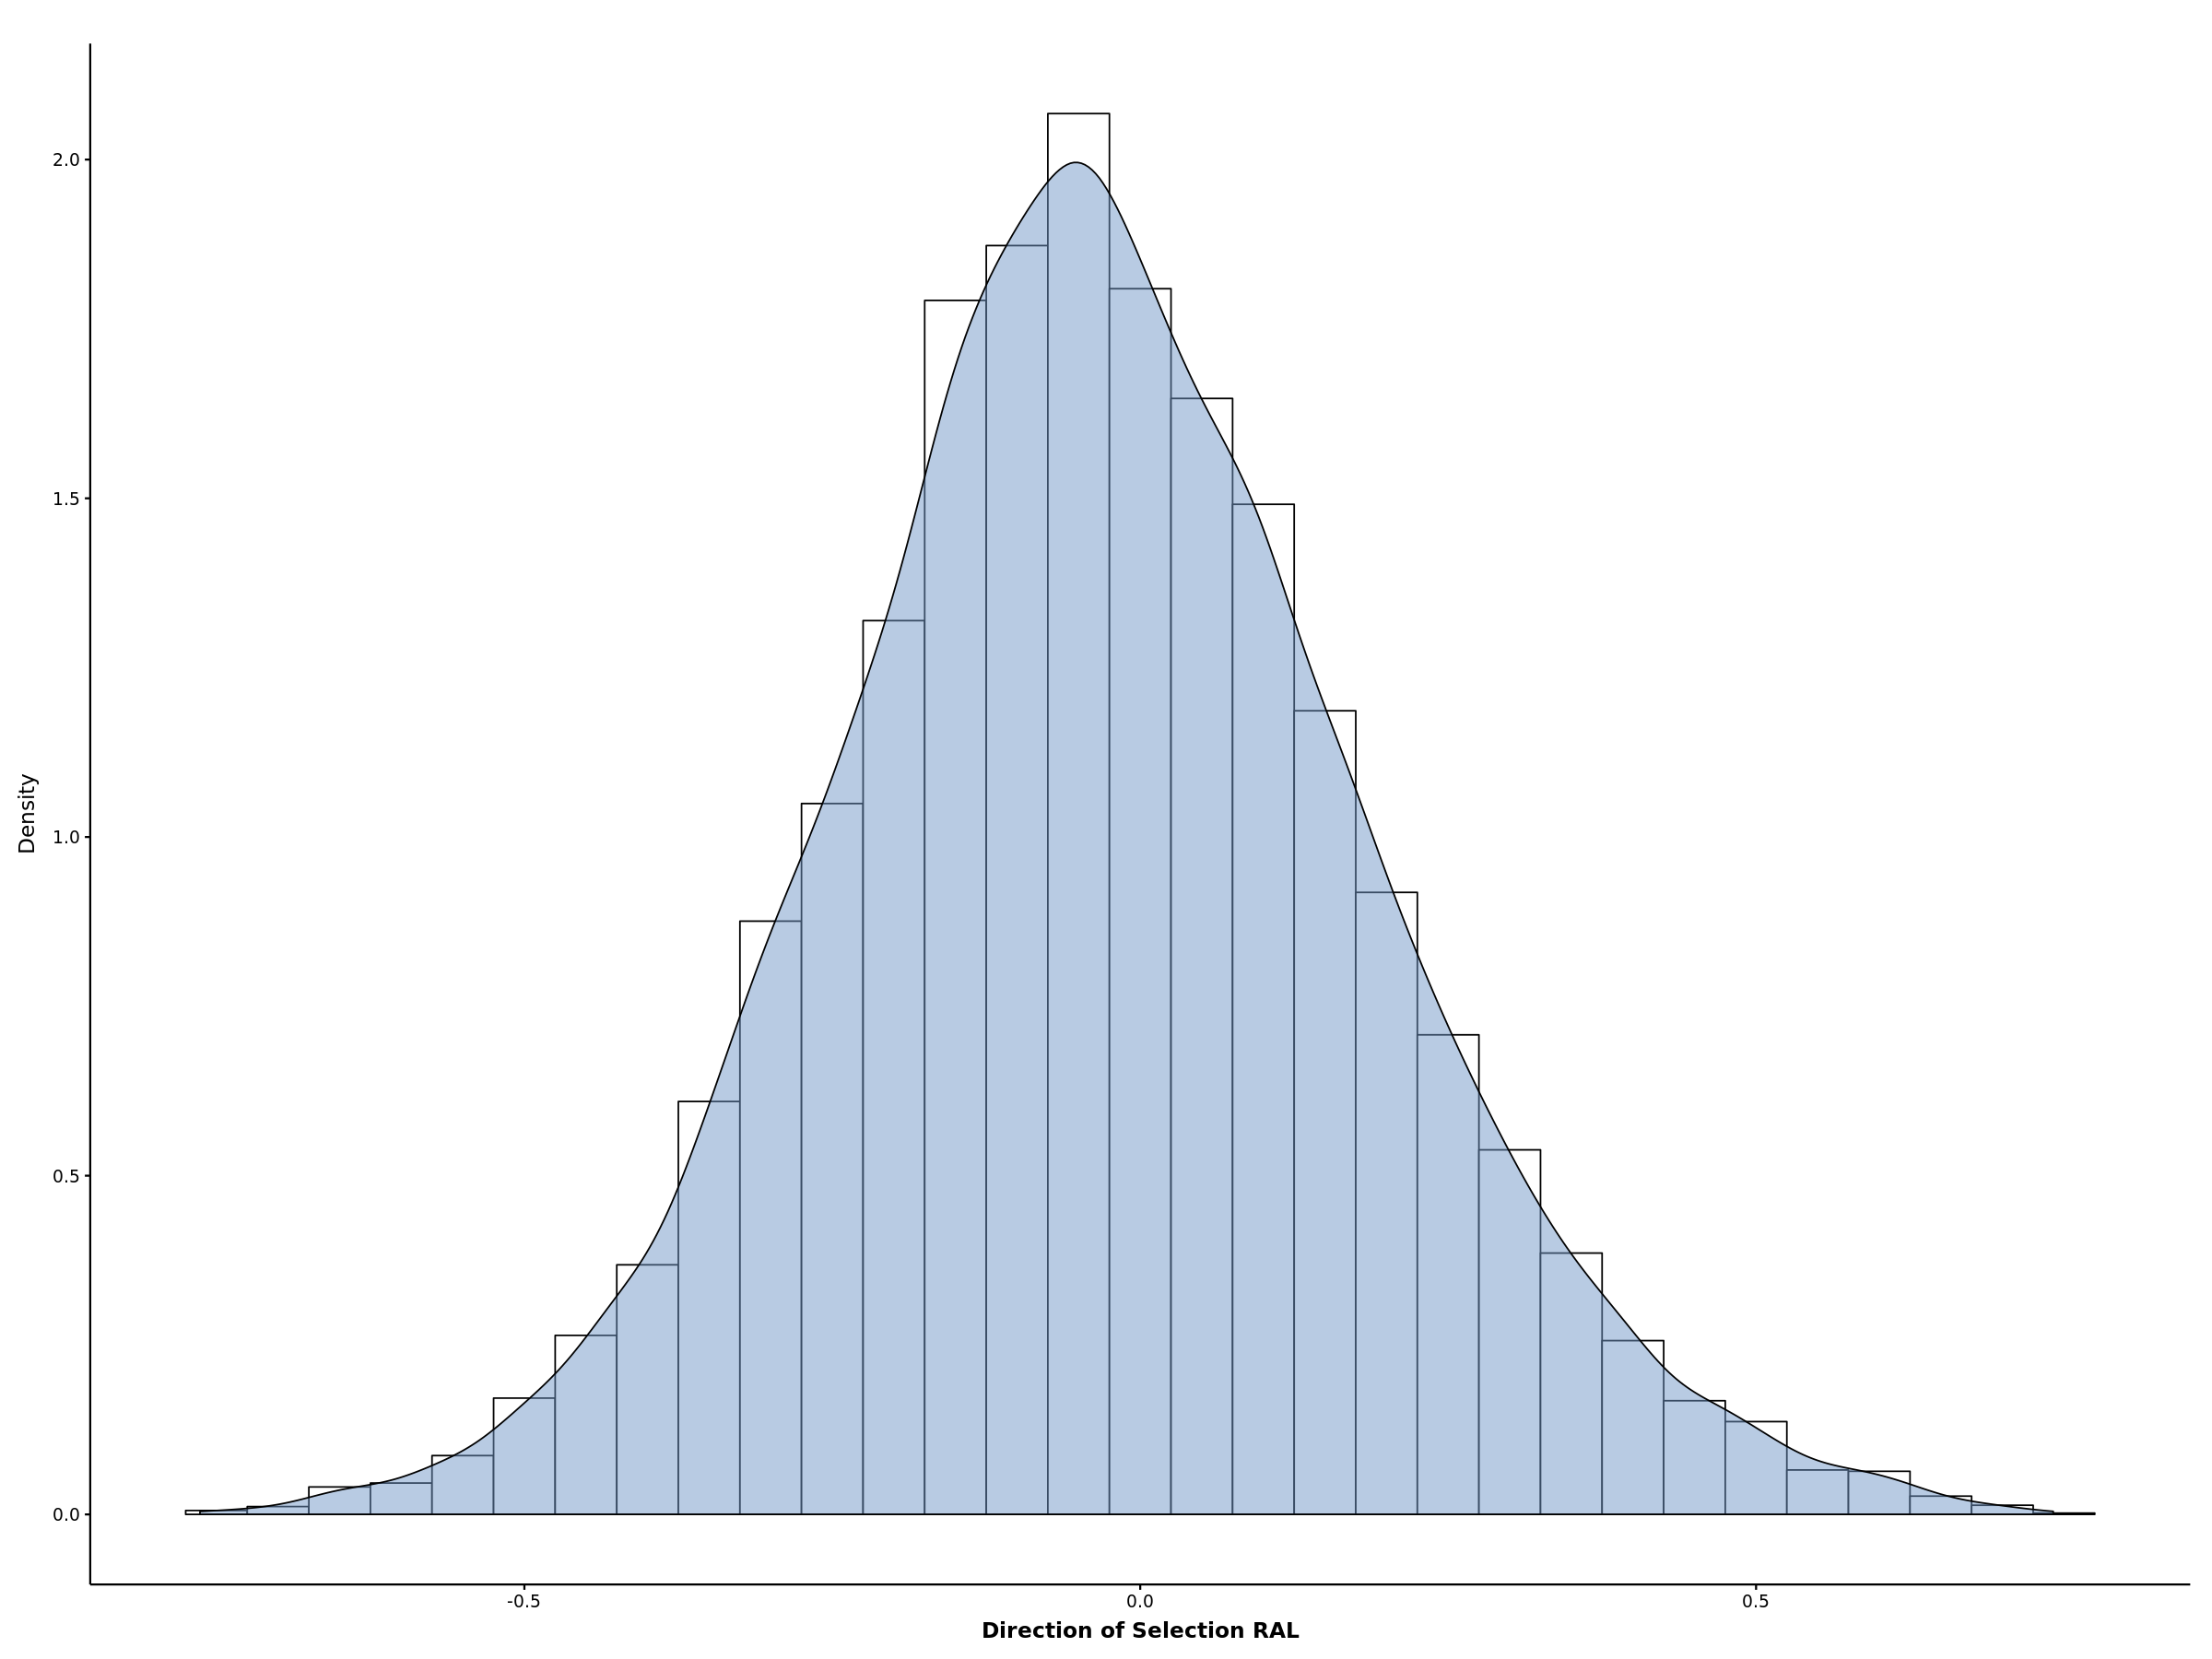

In [14]:
load('/home/jmurga/mktComparison/results/dosTables/dosRAL.RData')
ggplot(dosRAL$dos, aes(x=dos)) + 
    geom_histogram(aes(y=..density..),binwidth = .05,colour="black", fill="white") +
    geom_density(alpha=.5,fill='#7398C8') + 
    themePublication() + 
    scaleFillPublication() +
    labs(x = "Direction of Selection RAL", y=expression('Density'))

#### ZI

In [ ]:
zi <- dmelDataset[pop=='ZI']

In [ ]:
dosZI <- dosByGene(data=zi,geneList=dmelGeneList,population='ZI',cutoff=NULL)
# dosPiNeutralZI <- dosByGene(data=zi,geneList=dmelGeneList,population='ZI',cutoff=0.025)

In [ ]:
save(dosZI,file='/home/jmurga/mktComparison/results/dosTables/dosZI.RData')
# save(dosPiNeutralZI,file='/home/jmurga/mktComparison/results/dosTables/dosPiNeutralZI.RData')

Warning message:
“Removed 2037 rows containing non-finite values (stat_bin).”Warning message:
“Removed 2037 rows containing non-finite values (stat_density).”

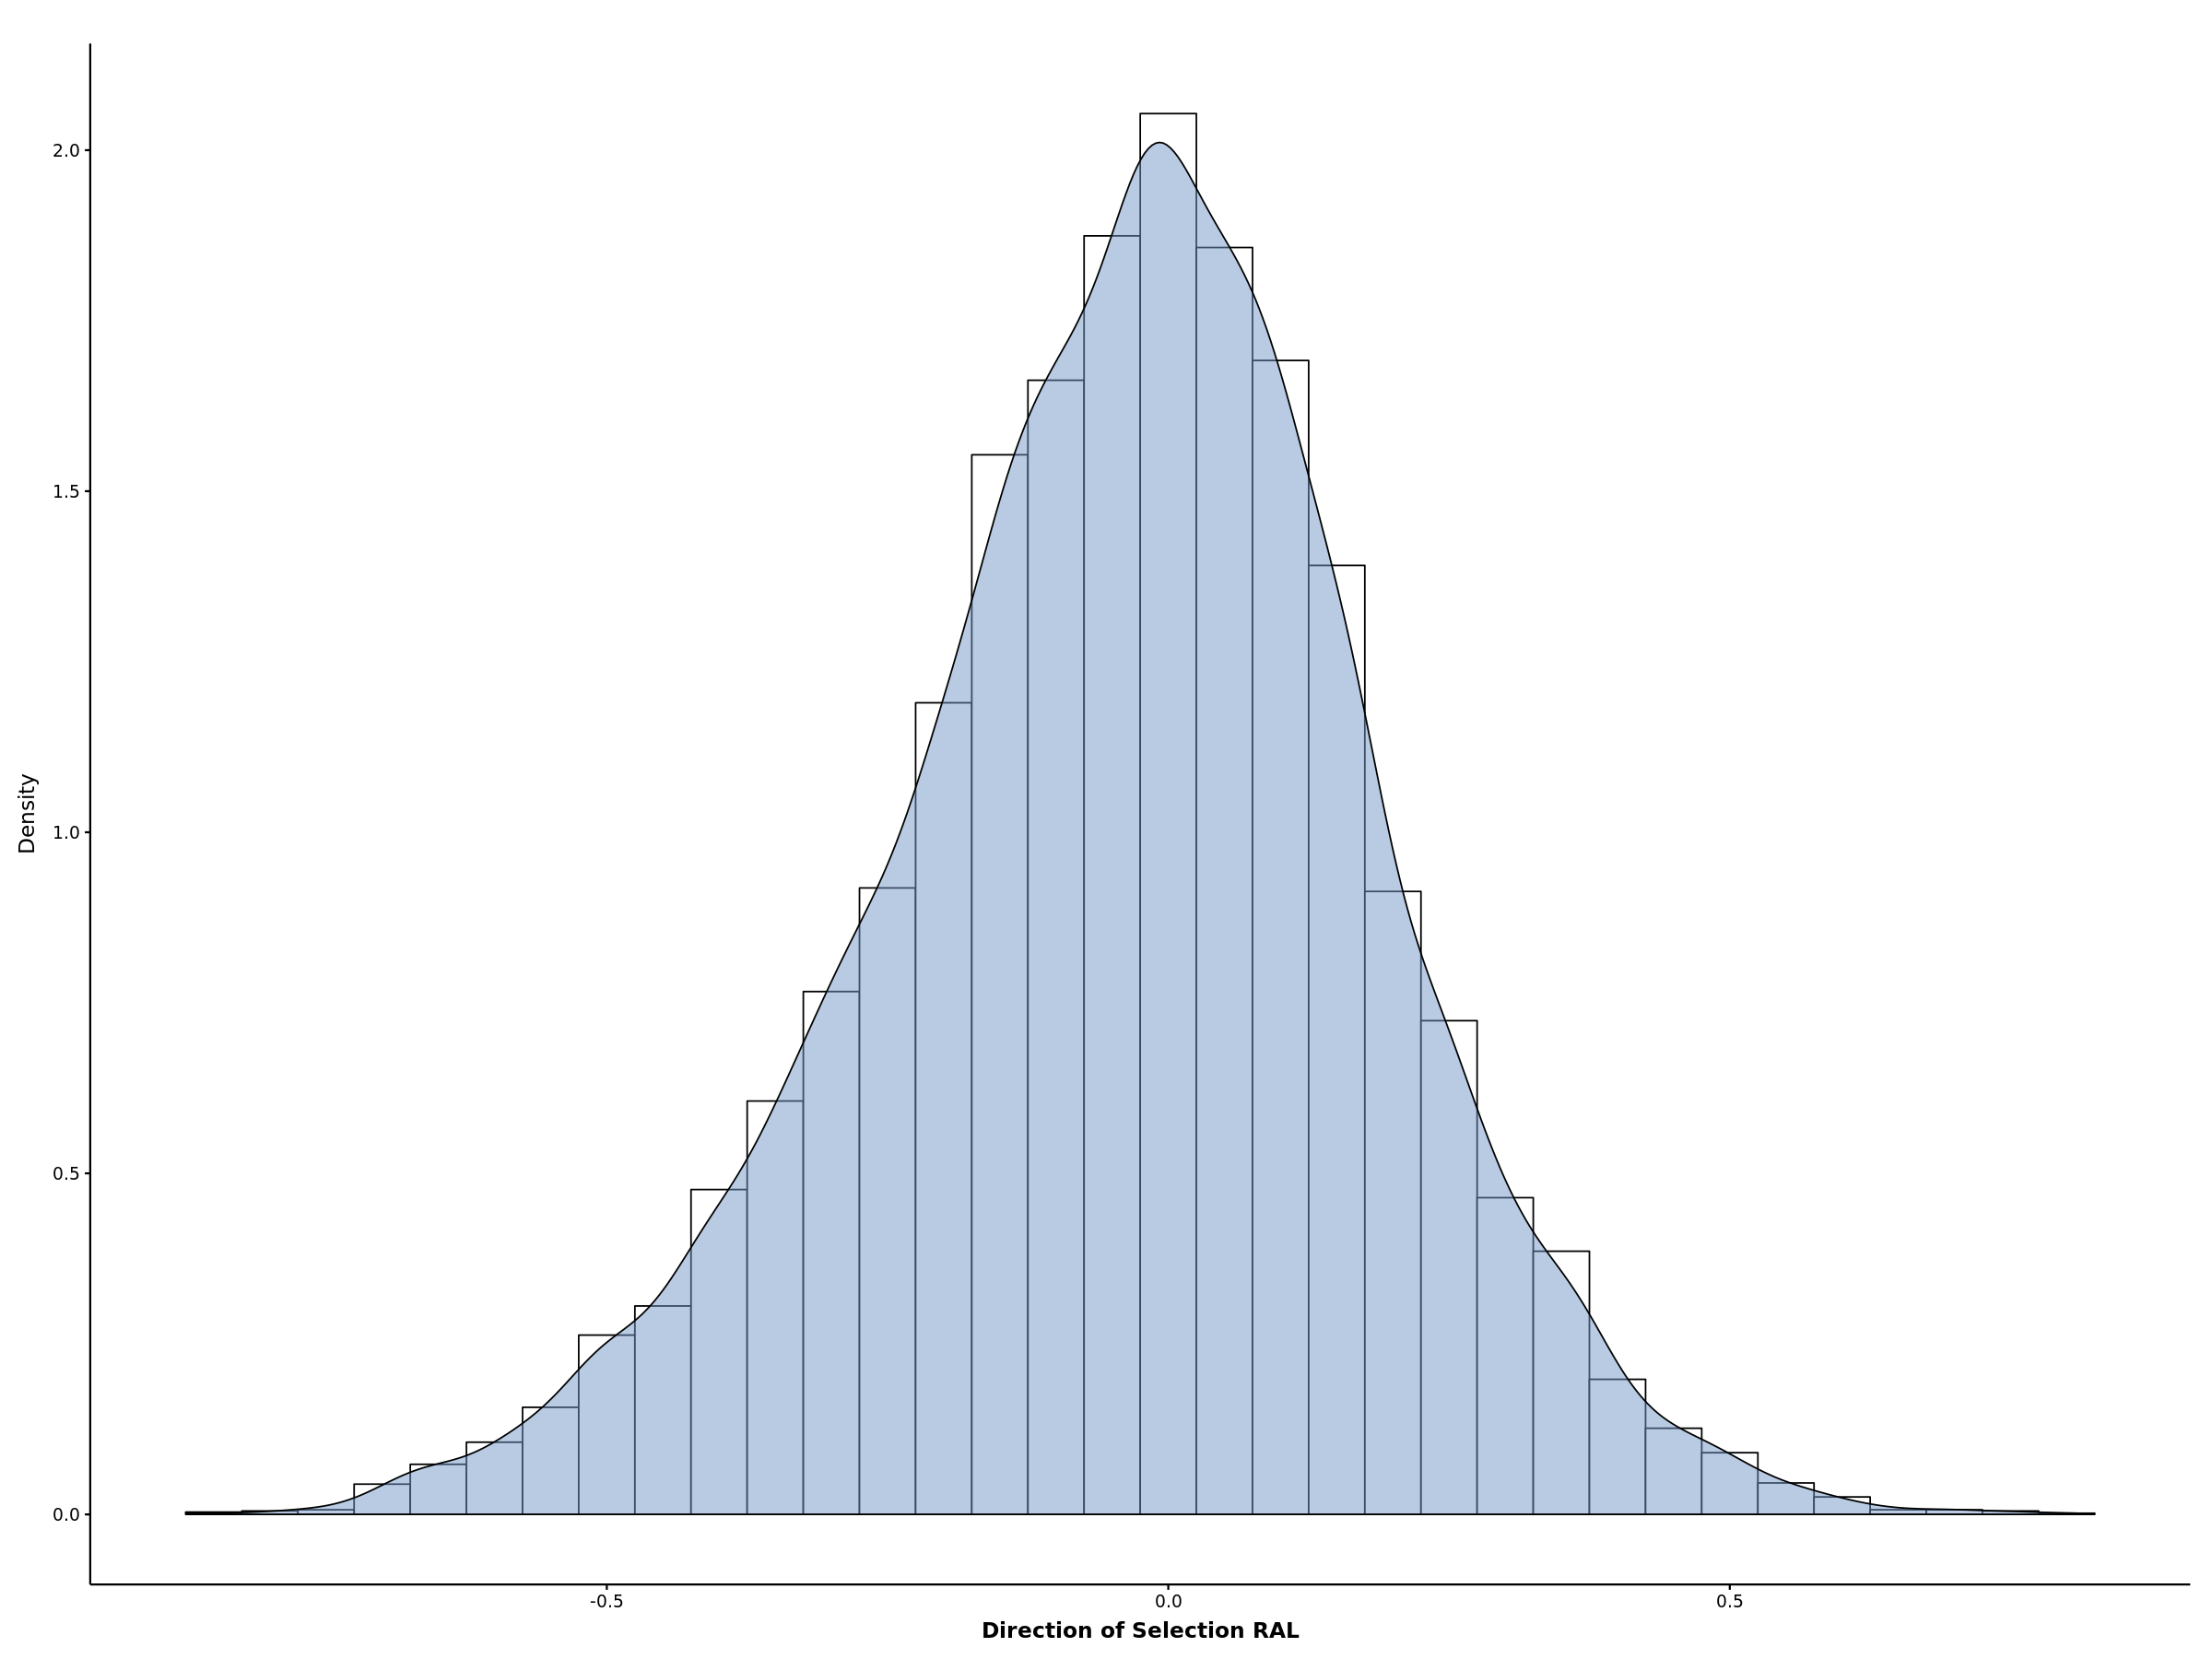

In [16]:
load('/home/jmurga/mktComparison/results/dosTables/dosPiNeutralZI.RData')
ggplot(dosPiNeutralZI$dos, aes(x=dos)) + 
    geom_histogram(aes(y=..density..),binwidth = .05,colour="black", fill="white") +
    geom_density(alpha=.5,fill='#7398C8') + 
    themePublication() + 
    scaleFillPublication() +
    labs(x = "Direction of Selection RAL", y=expression('Density'))

### Humans

In [ ]:
source('/home/jmurga/mktComparison/scripts/src/geneAnalysis.R')

In [ ]:
humanDataset <- fread('/home/jmurga/mktComparison/results/humanData.tab');humanDataset%>%head

In [ ]:
humanGeneList <- unique(humanDataset[['id']]);humanGeneList %>% head

#### CEU


In [ ]:
ceu <- humanDataset[pop=='CEU']

In [ ]:
dosCEU <- dosByGene(data=ceu,geneList=humanGeneList,population='CEU',cutoff=NULL)
# dosPiNeutralCEU <- dosByGene(data=ceu,geneList=humanGeneList,population='CEU',cutoff=0.025)

In [ ]:
save(dosCEU,file='/home/jmurga/mktComparison/results/dosTables/dosCEU.RData')
# save(dosPiNeutralCEU,file='/home/jmurga/mktComparison/results/dosTables/dosPiNeutralCEU.RData')

Warning message:
“Removed 13384 rows containing non-finite values (stat_bin).”Warning message:
“Removed 13384 rows containing non-finite values (stat_density).”

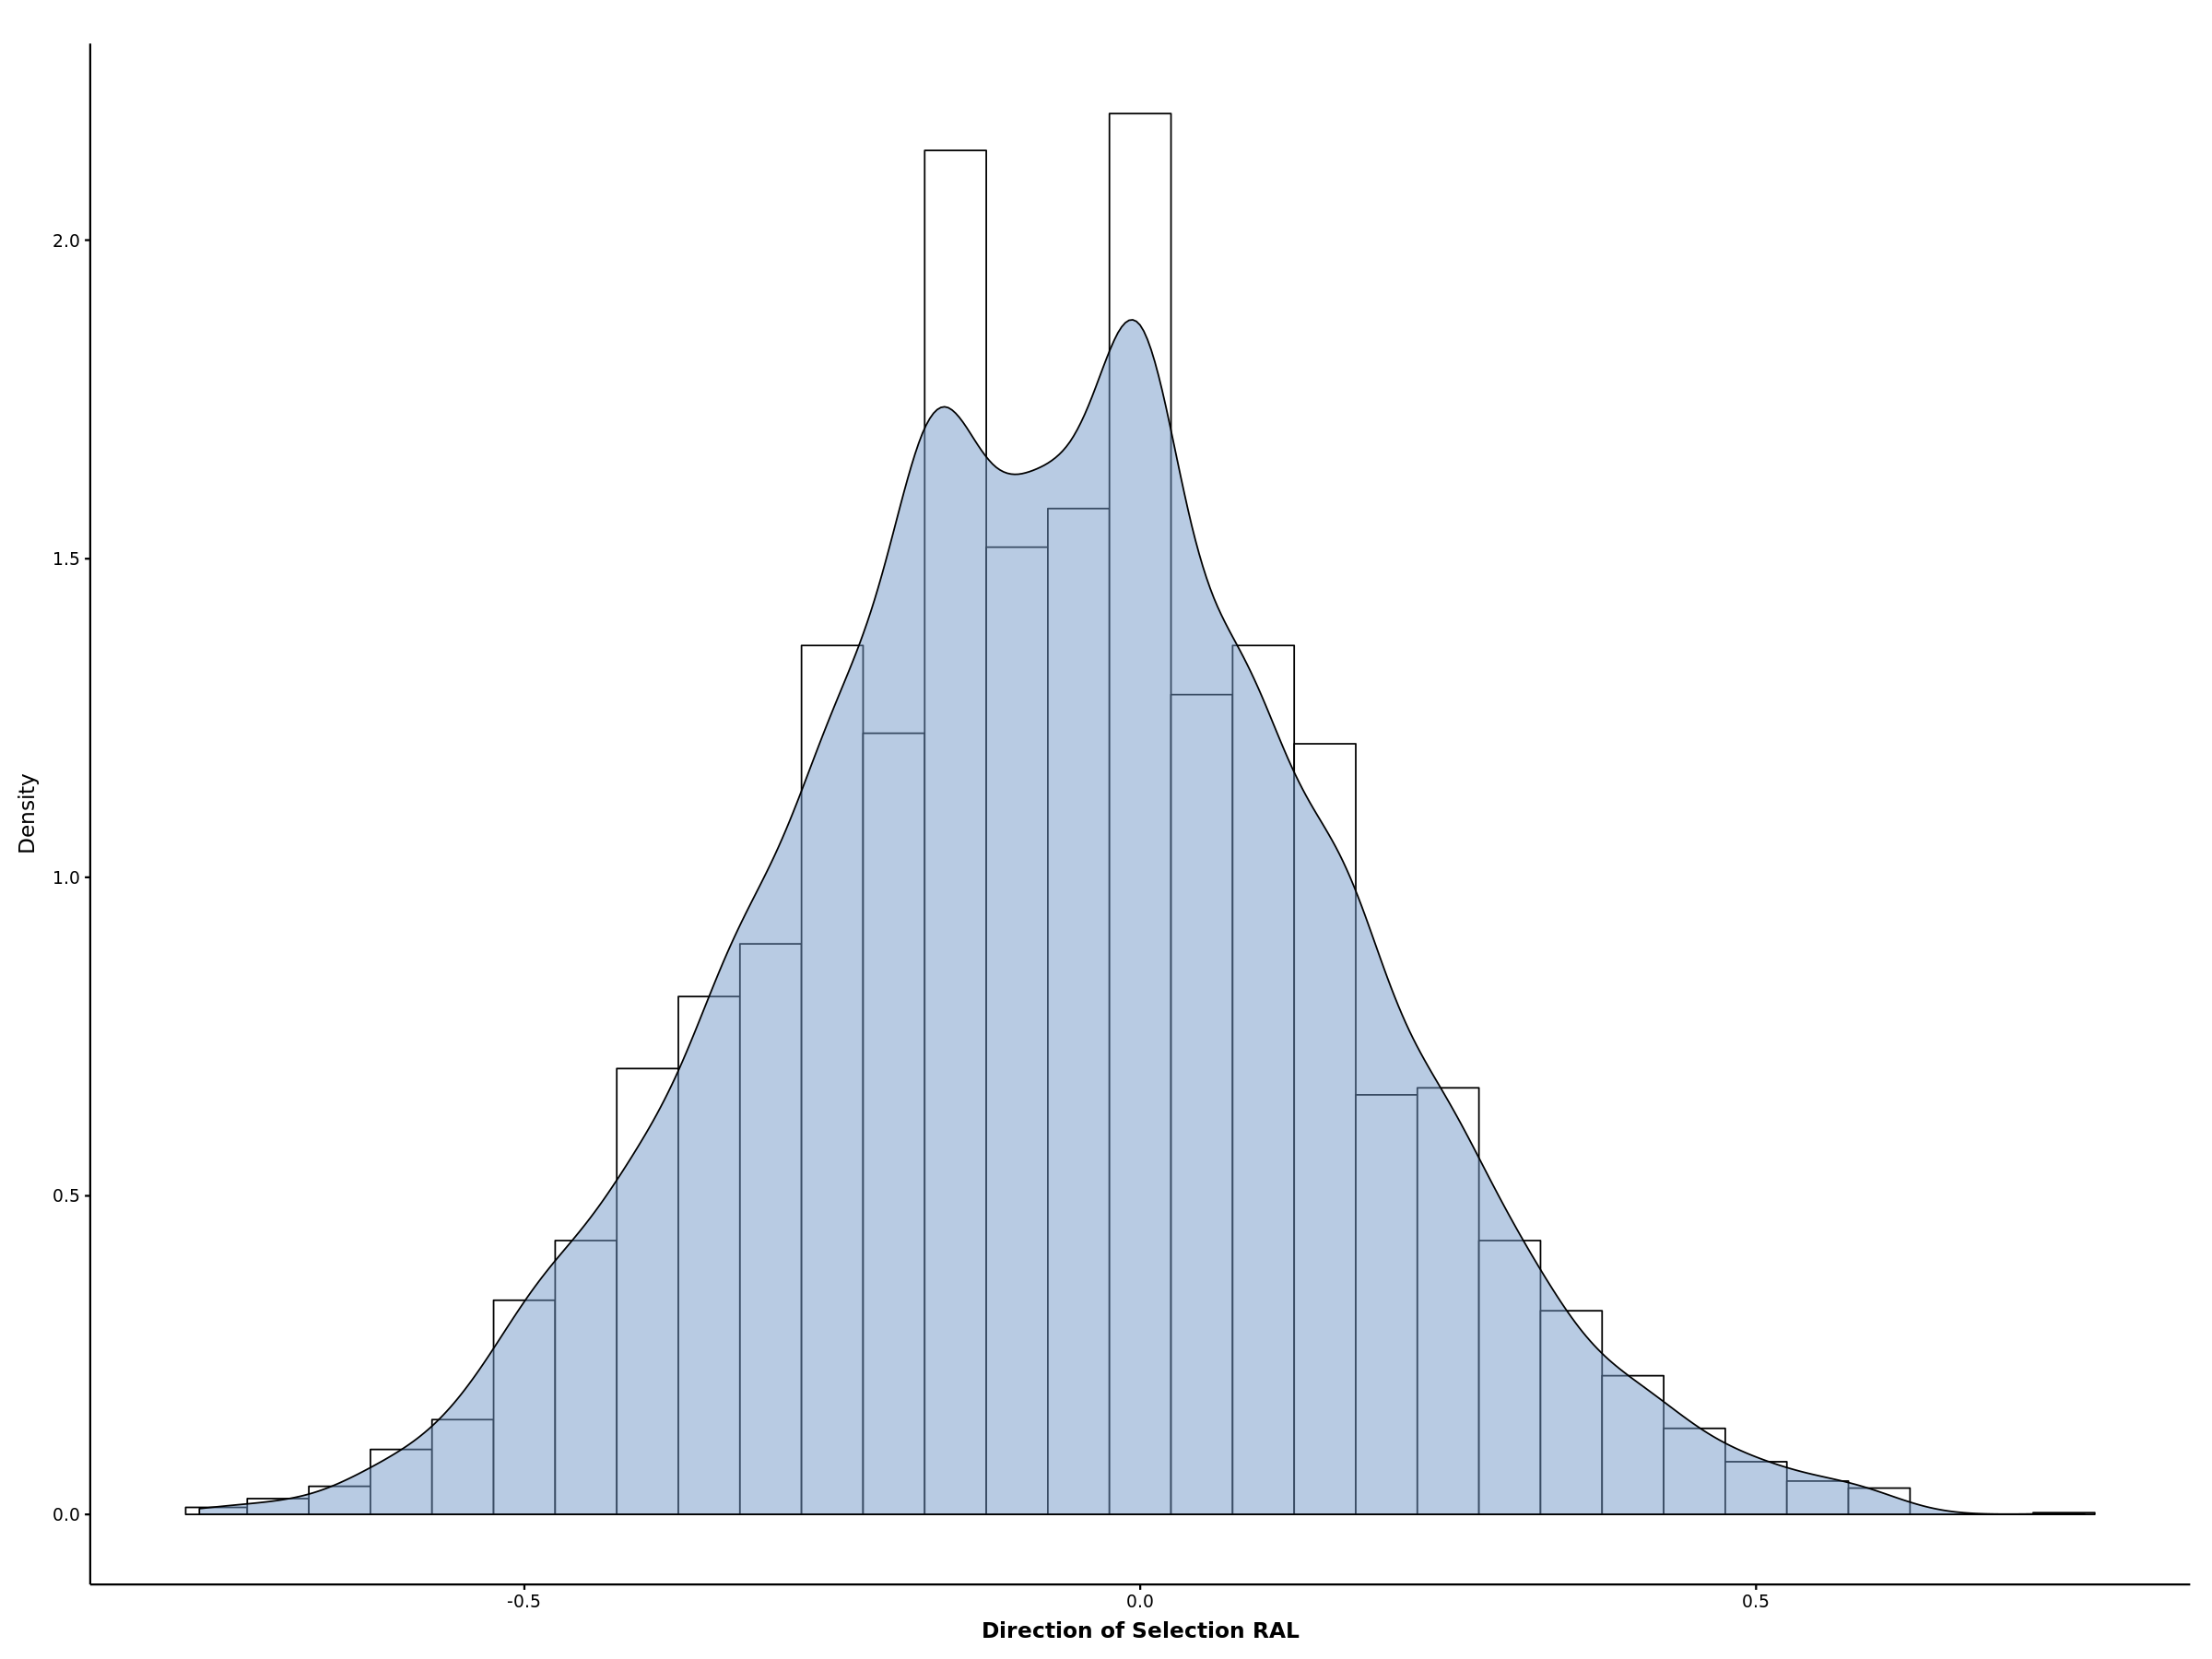

In [22]:
load('/home/jmurga/mktComparison/results/dosTables/dosCEU.RData')
ggplot(dosCEU$dos, aes(x=dos)) + 
    geom_histogram(aes(y=..density..),binwidth = .05,colour="black", fill="white") +
    geom_density(alpha=.5,fill='#7398C8') + 
    themePublication() + 
    scaleFillPublication() +
    labs(x = "Direction of Selection RAL", y=expression('Density'))

#### YRI

In [ ]:
yri <- humanDataset[pop=='YRI']

In [ ]:
dosYRI <- dosByGene(data=yri,geneList=humanGeneList,population='YRI',cutoff=NULL)
# dosPiNeutralYRI <- dosByGene(data=yri,geneList=humanGeneList,population='YRI',cutoff=0.025)

In [ ]:
save(dosYRI,file='/home/jmurga/mktComparison/results/dosTables/dosYRI.RData')
# save(dosPiNeutralYRI,file='/home/jmurga/mktComparison/results/dosTables/dosPiNeutralYRI.RData')

Warning message:
“Removed 11359 rows containing non-finite values (stat_bin).”Warning message:
“Removed 11359 rows containing non-finite values (stat_density).”

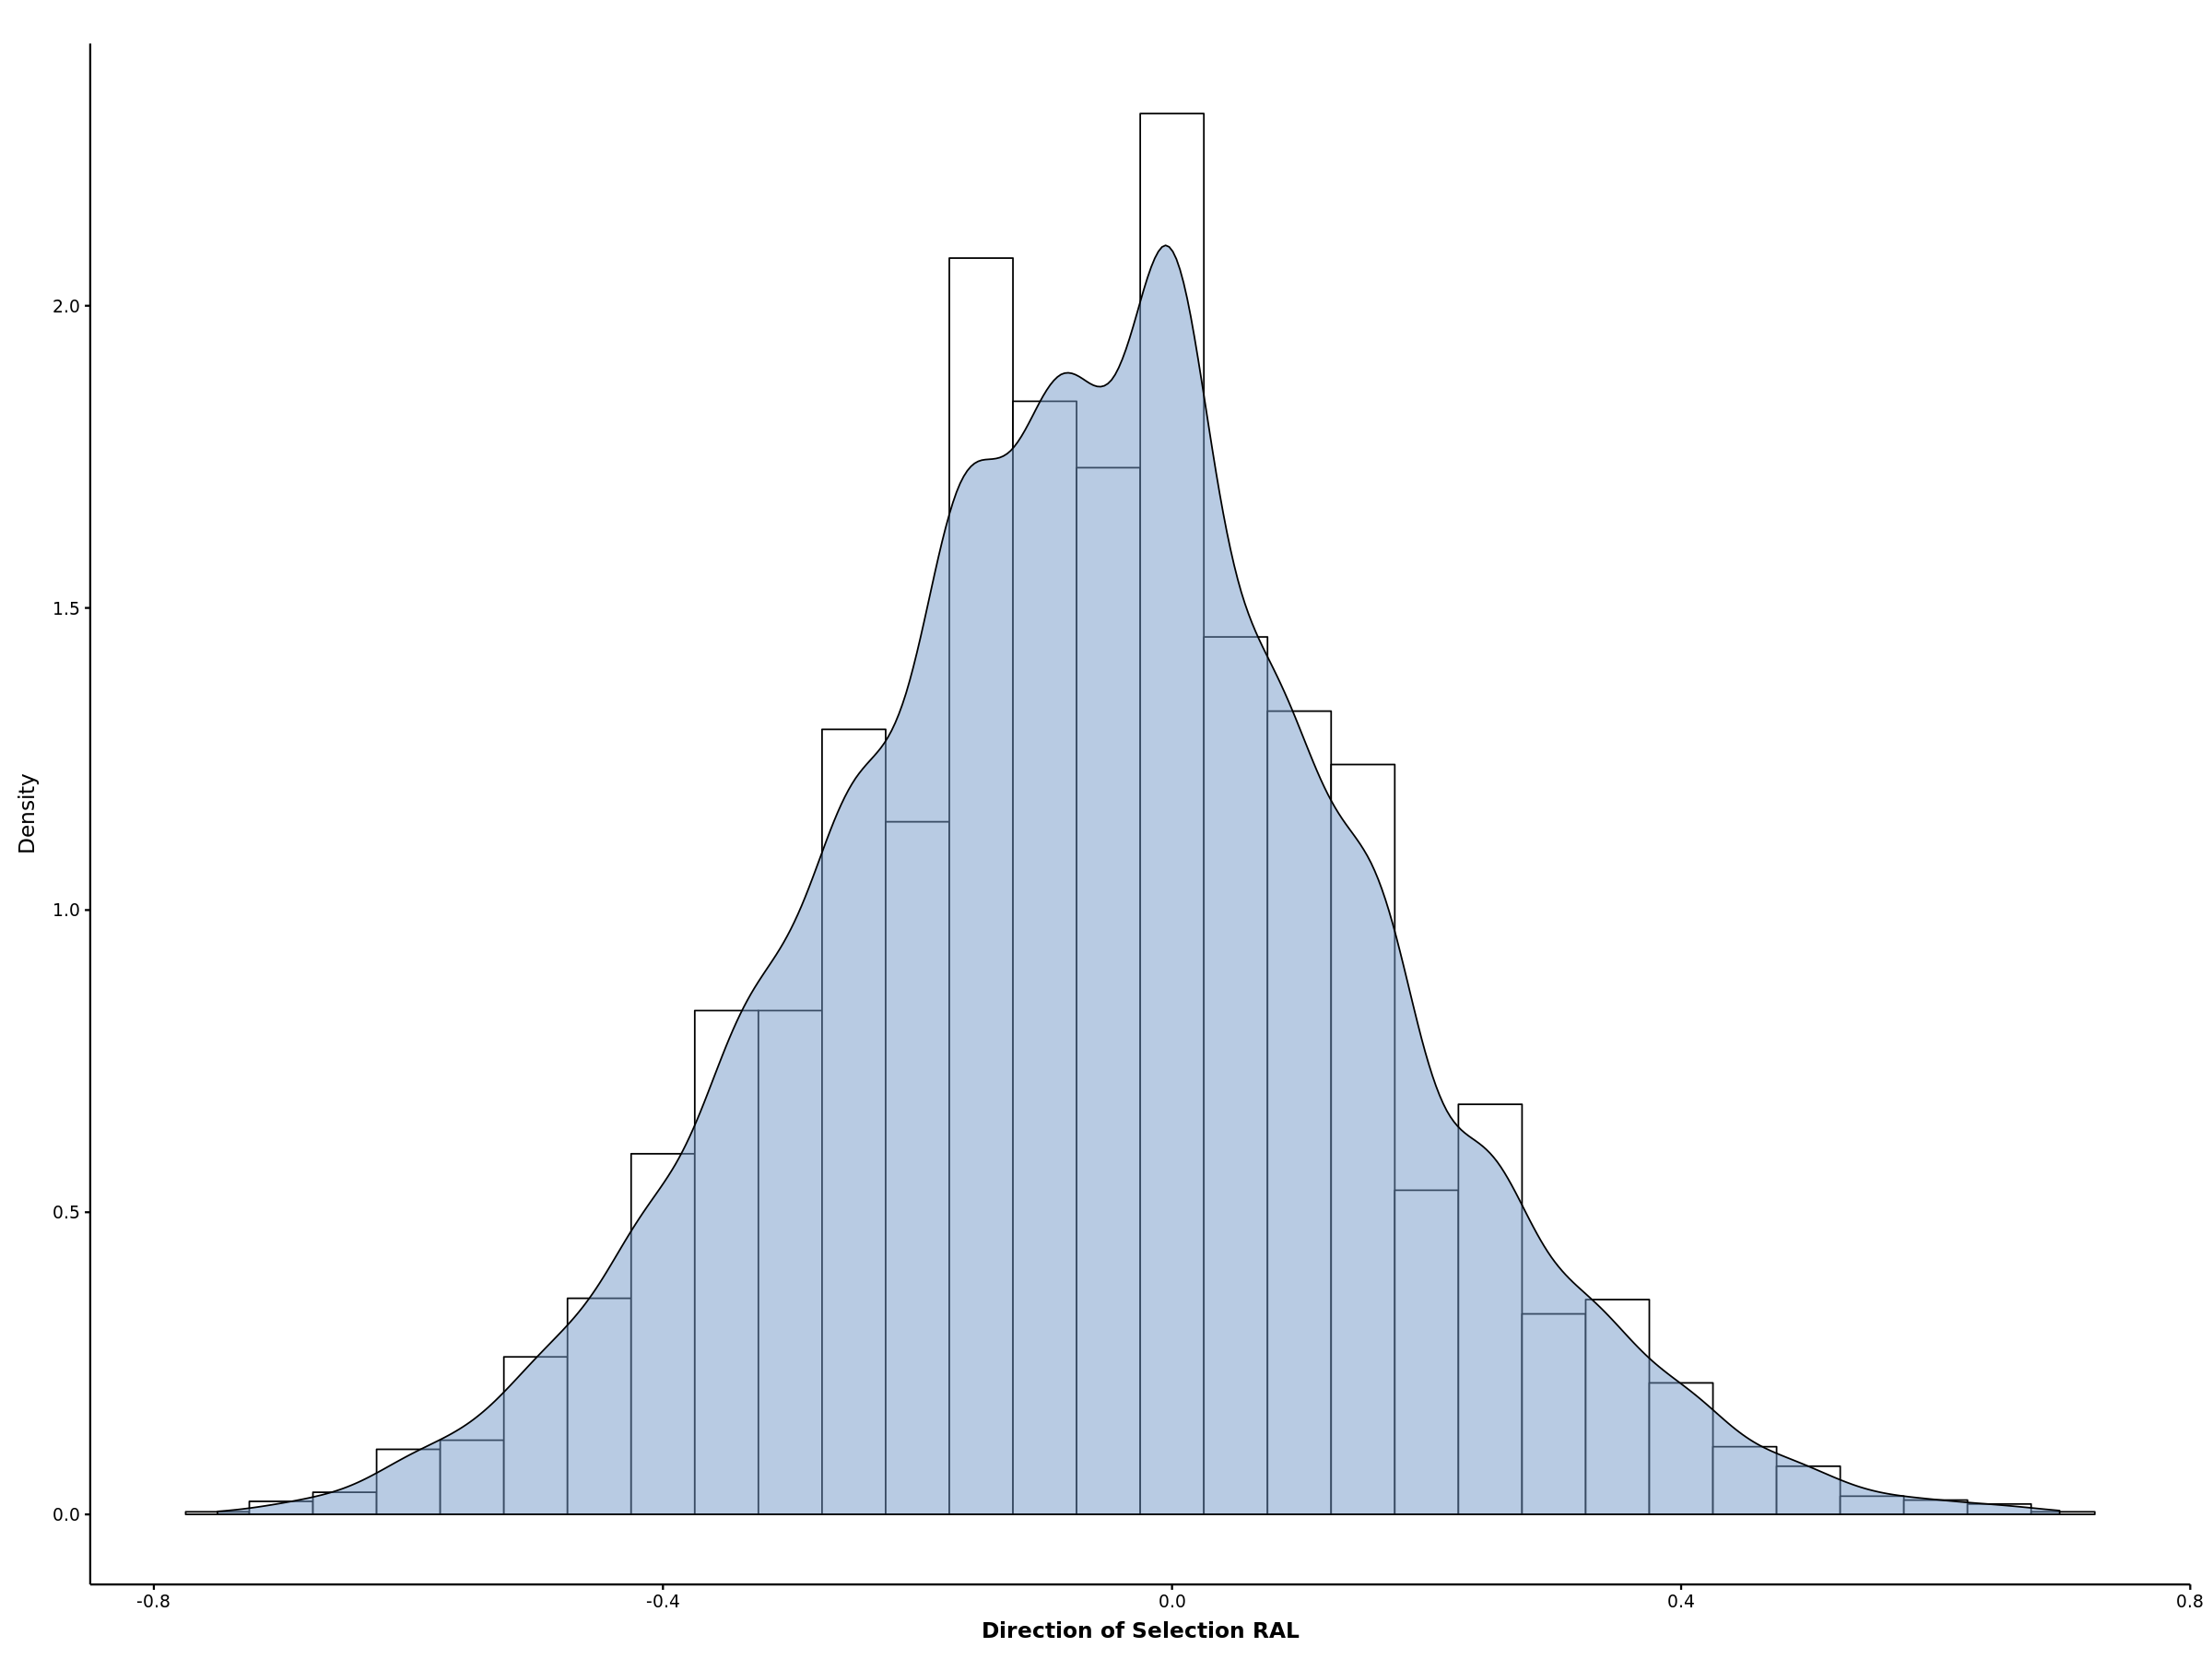

In [23]:
load('/home/jmurga/mktComparison/results/dosTables/dosYRI.RData')
ggplot(dosYRI$dos, aes(x=dos)) + 
    geom_histogram(aes(y=..density..),binwidth = .05,colour="black", fill="white") +
    geom_density(alpha=.5,fill='#7398C8') + 
    themePublication() + 
    scaleFillPublication() +
    labs(x = "Direction of Selection RAL", y=expression('Density'))

## Output alpha tables

### Alpha MKT

In [ ]:
lapply(list.files(pattern="*RData",include.dirs=T,full.names=T,path='/home/jmurga/mktComparison/results/alphaTables'),load,.GlobalEnv)
alphas <- do.call('rbind', lapply( ls(patt='RAL|ZI|CEU|YRI'),get))[,1]; alphas <- do.call('rbind',alphas) %>% as.data.table

In [ ]:
fwrite(alphas,file='/home/jmurga/mktComparison/results/alphaTables/alphaTableV2.tab',sep='\t',col.names = T,row.names = F,quote = F)

### Direction of Selection

In [ ]:
dos <- lapply(list.files(pattern="*RData",include.dirs=T,full.names=T,path='/home/jmurga/mktComparison/results/dosTables'),load,.GlobalEnv)
dos <- do.call('rbind', lapply( ls(patt='RAL|ZI|CEU|YRI'),get))[,2]; dos <- do.call('rbind',dos)

In [ ]:
fwrite(dos,file='/home/jmurga/mktComparison/results/dosTables/dosTable.tab',sep='\t',col.names = T,row.names = F,quote = F)

### Raleigh Venn diagram

#### RAL

In [1]:
install.packages('RAM')
library(RAM)

ERROR: Error in library(RAM): there is no package called ‘RAM’


In [7]:
ral <- lapply(list.files('/home/jmurga/mktComparison/results/alphaTables', pattern="RAL", full.names=TRUE),load,.GlobalEnv)

In [ ]:
# group.venn(list(Standard=standardRAL$posSigGenes,FWW=FWWRAL0.05$posSigGenes,eMKT=eMKTRAL0.05$posSigGenes,aMKT=aMKTRAL$posSigGenes,caMKT=caMKTRAL$posSigGenes),label=FALSE)
svg('/home/jmurga/mktComparison/results/alphaTables/ralDiagram.svg')
group.venn(list(Standard=standardRAL$posSigGenes,FWW=FWWRAL0.05$posSigGenes,eMKT=eMKTRAL0.05$posSigGenes),label=FALSE,fill = c("blue", "orange",'green'),cat.pos = c(180,180, 180),cat.dist=c(0.1,0.1,.1),lab.cex=1.1)
dev.off()

#### ZI

In [ ]:
library(RAM)

In [7]:
zi <- lapply(list.files('/home/jmurga/mktComparison/results/alphaTables', pattern="ZI", full.names=TRUE),load,.GlobalEnv)

In [ ]:
svg('/home/jmurga/mktComparison/results/alphaTables/ziDiagram.svg')
group.venn(list(Standard=standardZI$posSigGenes,FWW=FWWZI0.05$posSigGenes,eMKT=eMKTZI0.05$posSigGenes),label=FALSE,fill = c("blue", "orange",'green'),cat.pos = c(180,180, 180),cat.dist=c(0.1,0.1,.1),lab.cex=1.1)
dev.off()

#### CEU

In [ ]:
ceu <- lapply(list.files('/home/jmurga/mktComparison/results/alphaTables', pattern="CEU", full.names=TRUE),load,.GlobalEnv)
svg('/home/jmurga/mktComparison/results/alphaTables/CEUDiagram.svg')
group.venn(list(Standard=standardCEU$posSigGenes,FWW=FWWCEU0.05$posSigGenes,eMKT=eMKTCEU0.05$posSigGenes),label=FALSE,fill = c("blue", "orange",'green'),cat.pos = c(180,180, 180),cat.dist=c(0.1,0.1,.1),lab.cex=1.1)
dev.off()

#### YRI

In [ ]:
yri <- lapply(list.files('/home/jmurga/mktComparison/results/alphaTables', pattern="YRI", full.names=TRUE),load,.GlobalEnv)
svg('/home/jmurga/mktComparison/results/alphaTables/YRIDiagram.svg')
group.venn(list(Standard=standardYRI$posSigGenes,FWW=FWWYRI0.05$posSigGenes,eMKT=eMKTYRI0.05$posSigGenes),label=FALSE,fill = c("blue", "orange",'green'),cat.pos = c(180,180, 180),cat.dist=c(0.1,0.1,.1),lab.cex=1.1)
dev.off()